In [58]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import plotly.graph_objects as go

from pygold.graphs import configurar_grafica
from pygold.download import descargar_datos_yahoo
from pygold.tasa_rendimiento import calcular_tasa_rendimiento_df

warnings.filterwarnings("ignore")
configurar_grafica()

In [3]:
# Ejemplo de uso:
ticker_symbol = "GC=F"  # oro
start_date = "1980-01-01"

# Get today date in format 'YYYY-MM-DD'
end_date = pd.to_datetime("today").strftime("%Y-%m-%d")

# end_date = "2023-12-31"
interval = "1d"

data = descargar_datos_yahoo(ticker_symbol, start_date, end_date, interval)
if data is not None:
    print(data.head())

[*********************100%***********************]  1 of 1 completed

                  open        high         low       close   adj close  volume
time                                                                          
2000-08-30  273.899994  273.899994  273.899994  273.899994  273.899994       0
2000-08-31  274.799988  278.299988  274.799988  278.299988  278.299988       0
2000-09-01  277.000000  277.000000  277.000000  277.000000  277.000000       0
2000-09-05  275.799988  275.799988  275.799988  275.799988  275.799988       2
2000-09-06  274.200012  274.200012  274.200012  274.200012  274.200012       0


In [60]:
fig = go.Figure(
    data=[
        go.Candlestick(
            x=data.index,
            open=data["open"],
            high=data["high"],
            low=data["low"],
            close=data["adj close"],
        )
    ]
)

fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [52]:
agg_data = data.resample("Y")[["adj close"]].agg(
    {"adj close": [np.mean, np.std, np.min, np.max, np.median]}
)

In [55]:
agg_data.columns = agg_data.columns.droplevel(0)

In [56]:
agg_data

,mean,std,min,max,median
time,,,,,
2000-12-31,270.280952,3.696514,263.899994,278.399994,270.399994
2001-12-31,271.043724,8.712837,255.100006,293.299988,269.700012
2002-12-31,310.475601,14.558077,278.100006,349.200012,312.750000
2003-12-31,363.719601,22.272108,321.500000,416.899994,361.750000
2004-12-31,409.520481,18.375973,374.799988,456.000000,406.600006
2005-12-31,445.271774,27.335988,412.600006,528.400024,434.949997
2006-12-31,604.216402,39.163777,526.299988,719.799988,610.149994
2007-12-31,697.005157,59.189282,604.900024,839.599976,670.649994
2008-12-31,870.982609,67.906698,704.900024,1003.200012,882.900024


In [57]:


fig = go.Figure(
    data=[
        go.Candlestick(
            x=agg_data.index,
            open=agg_data["mean"],
            high=agg_data["max"],
            low=agg_data["min"],
            close=agg_data["median"],
        )
    ]
)

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [21]:
def rendimiento_anual(
    data: pd.DataFrame, col: str = "adj close", sort_by_date: bool = False
):
    """
    Calcula la tasa de rendimiento anual año por año.

    Argumentos:
    data -- DataFrame que contiene los datos con fechas en el índice.
    col -- Nombre de la columna a usar (por defecto 'adj close').
    sort_by_date -- Si es True, ordena los resultados por fecha.

    Devuelve:
    results -- Lista de tuplas (año, rendimiento).
    """
    results = []
    years = data.index.year.unique()
    for year in years:
        start_date = f"{year}-01-01"
        end_date = f"{year}-12-31"
        r = calcular_tasa_rendimiento_df(
            data, start_date=start_date, end_date=end_date, col=col
        )
        results.append((year, r))

    results = sorted(results, key=lambda x: x[1])

    if sort_by_date:
        results = sorted(results, key=lambda x: x[0])
    return results


In [24]:
hola = rendimiento_anual(data, sort_by_date=True)

Fecha de inicio ajustada a la más cercana disponible: 2000-08-30 00:00:00
Fecha de fin ajustada a la más cercana disponible: 2000-12-29 00:00:00
Fecha de inicio ajustada a la más cercana disponible: 2001-01-02 00:00:00
Fecha de inicio ajustada a la más cercana disponible: 2001-12-31 00:00:00
Fecha de inicio ajustada a la más cercana disponible: 2002-12-31 00:00:00
Fecha de inicio ajustada a la más cercana disponible: 2003-12-31 00:00:00
Fecha de fin ajustada a la más cercana disponible: 2004-12-30 00:00:00
Fecha de inicio ajustada a la más cercana disponible: 2004-12-30 00:00:00
Fecha de fin ajustada a la más cercana disponible: 2005-12-30 00:00:00
Fecha de inicio ajustada a la más cercana disponible: 2005-12-30 00:00:00
Fecha de fin ajustada a la más cercana disponible: 2006-12-29 00:00:00
Fecha de inicio ajustada a la más cercana disponible: 2007-01-02 00:00:00
Fecha de inicio ajustada a la más cercana disponible: 2007-12-31 00:00:00
Fecha de inicio ajustada a la más cercana disponib

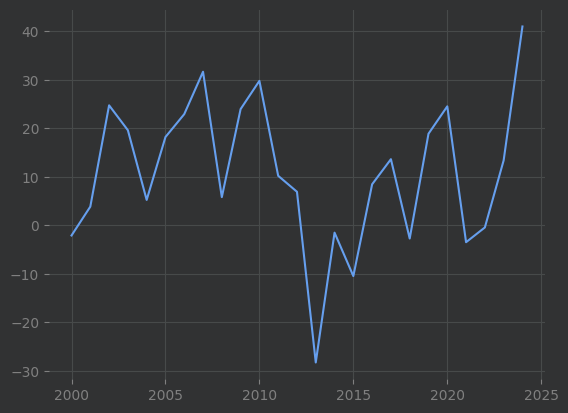

In [28]:
years = [x[0] for x in hola]
values = [x[1] * 100 for x in hola]

plt.plot(years, values)

In [35]:
def drawdown_maximo_anual(data, col="adj close"):
    """
    Calcula el drawdown máximo de cada año, es decir, la mayor caída desde un pico hasta un
    valle dentro del mismo año.

    Argumentos:
    data -- DataFrame de pandas con datos de tiempo.
    col -- Nombre de la columna a observar (por defecto: 'adj close').

    Devuelve:
    results -- Lista de tuplas (año, max_drawdown).
    """
    results = []
    years = data.index.year.unique()
    for year in years:
        start_date = f"{year}-01-01"
        end_date = f"{year}-12-31"
        data_year = data.loc[start_date:end_date]

        # Encontrar los picos y valles
        max_value = data_year[col].max()
        min_value = data_year[col].min()

        # Calcular max drawdown
        drawdown = (min_value - max_value) / max_value
        results.append((year, drawdown))

    return sorted(results, key=lambda x: x[0])


In [36]:
drawdown_maximo_anual(data)

[(2000, np.float64(-0.05208333447518479)),
 (2001, np.float64(-0.1302420159540453)),
 (2002, np.float64(-0.2036082577836863)),
 (2003, np.float64(-0.22883184287158337)),
 (2004, np.float64(-0.17807020220840186)),
 (2005, np.float64(-0.21915218198363323)),
 (2006, np.float64(-0.2688246780793988)),
 (2007, np.float64(-0.27953782515070147)),
 (2008, np.float64(-0.29734846906222756)),
 (2009, np.float64(-0.3373583078451983)),
 (2010, np.float64(-0.25958766501418057)),
 (2011, np.float64(-0.3019536938114286)),
 (2012, np.float64(-0.1437489704718571)),
 (2013, np.float64(-0.29406901847193184)),
 (2014, np.float64(-0.17164608496872732)),
 (2015, np.float64(-0.19212724819325233)),
 (2016, np.float64(-0.2132024285990641)),
 (2017, np.float64(-0.13789002643828938)),
 (2018, np.float64(-0.13667063263762635)),
 (2019, np.float64(-0.18125523521231163)),
 (2020, np.float64(-0.2798927375929198)),
 (2021, np.float64(-0.14083064826982972)),
 (2022, np.float64(-0.20430367714606895)),
 (2023, np.float64(

In [8]:
calcular_tasa_rendimiento_df(
    data, start_date="2021-01-01", end_date="2021-12-31", col="adj close"
)

Fecha de inicio ajustada a la más cercana disponible: 2020-12-31 00:00:00


np.float64(-0.034675463394449935)

<Axes: title={'center': 'GC=F - Precio de cierre ajustado'}, xlabel='time'>

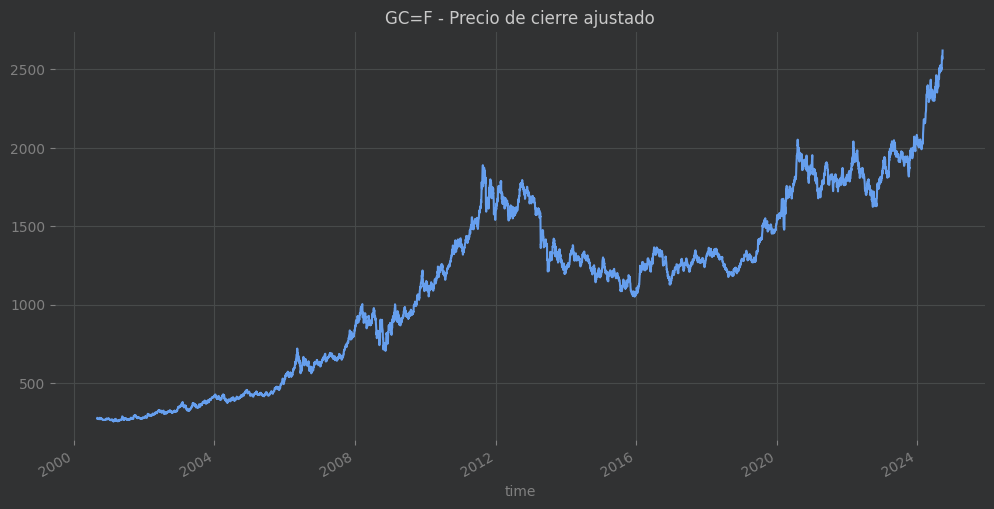

In [10]:
data["adj close"].plot(
    title=f"{ticker_symbol} - Precio de cierre ajustado", figsize=(12, 6)
)

In [9]:
rendimiento_anual(data)

Fecha de inicio ajustada a la más cercana disponible: 2000-08-30 00:00:00
Fecha de fin ajustada a la más cercana disponible: 2000-12-29 00:00:00
Fecha de inicio ajustada a la más cercana disponible: 2001-01-02 00:00:00
Fecha de inicio ajustada a la más cercana disponible: 2001-12-31 00:00:00
Fecha de inicio ajustada a la más cercana disponible: 2002-12-31 00:00:00
Fecha de inicio ajustada a la más cercana disponible: 2003-12-31 00:00:00
Fecha de fin ajustada a la más cercana disponible: 2004-12-30 00:00:00
Fecha de inicio ajustada a la más cercana disponible: 2004-12-30 00:00:00
Fecha de fin ajustada a la más cercana disponible: 2005-12-30 00:00:00
Fecha de inicio ajustada a la más cercana disponible: 2005-12-30 00:00:00
Fecha de fin ajustada a la más cercana disponible: 2006-12-29 00:00:00
Fecha de inicio ajustada a la más cercana disponible: 2007-01-02 00:00:00
Fecha de inicio ajustada a la más cercana disponible: 2007-12-31 00:00:00
Fecha de inicio ajustada a la más cercana disponib

[(2013, np.float64(-0.2825251466360612)),
 (2015, np.float64(-0.10446832166726083)),
 (2021, np.float64(-0.034675463394449935)),
 (2018, np.float64(-0.027111458455579385)),
 (2000, np.float64(-0.02079318053128909))]

In [12]:
resultados = calcular_acumulado_5_anos(data)
for res in resultados:
    print(
        f"* De {res[0]} a {res[1]} (5 años) || rentabilidad media anualizada = {res[2]:.4%}"
    )


* De 2004-12-30 00:00:00 a 2010-12-31 00:00:00 (5 años) || rentabilidad media anualizada = 21.6900%
* De 2005-12-30 00:00:00 a 2011-12-30 00:00:00 (5 años) || rentabilidad media anualizada = 20.2851%
* De 2001-12-31 00:00:00 a 2007-12-31 00:00:00 (5 años) || rentabilidad media anualizada = 20.0700%
* De 2003-12-31 00:00:00 a 2009-12-31 00:00:00 (5 años) || rentabilidad media anualizada = 17.5176%
* De 2006-12-29 00:00:00 a 2012-12-31 00:00:00 (5 años) || rentabilidad media anualizada = 17.5156%
* De 2002-12-31 00:00:00 a 2008-12-31 00:00:00 (5 años) || rentabilidad media anualizada = 16.8191%
* De 2000-12-29 00:00:00 a 2006-12-29 00:00:00 (5 años) || rentabilidad media anualizada = 15.1872%
* De 2018-12-31 00:00:00 a 2024-09-24 00:00:00 (5 años) || rentabilidad media anualizada = 13.5691%
* De 2015-12-31 00:00:00 a 2021-12-31 00:00:00 (5 años) || rentabilidad media anualizada = 9.4954%
* De 2014-12-31 00:00:00 a 2020-12-31 00:00:00 (5 años) || rentabilidad media anualizada = 8.1356%
* 

In [15]:
np.mean([x[-1] for x in resultados])

np.float64(0.09473895466246002)

In [21]:
len(resultados)

19

In [6]:
# Crear media móvil simple de 30 días
data["SMA fast"] = data["close"].rolling(30).mean()

# Crear media móvil simple de 60 días
data["SMA slow"] = data["close"].rolling(60).mean()

In [ ]:
# Plot the results
data[["close", "SMA fast", "SMA slow"]].plot(figsize=(15, 8))

In [ ]:
# Plot the results
data[["close", "SMA fast", "SMA slow"]].loc["2024"].plot(figsize=(15, 8))

In [10]:
data["position"] = np.nan

# Create the condition
data.loc[(data["SMA fast"] > data["SMA slow"]), "position"] = 1
data.loc[(data["SMA fast"] < data["SMA slow"]), "position"] = -1

In [ ]:
# Representamos toda la señal para asegurarnos de que sea correcta

year = "2024"

# Seleccionar toda la señal en una lista de índices para representar sólo estos puntos
idx_open = data.loc[data["position"] == 1].loc[year].index
idx_close = data.loc[data["position"] == -1].loc[year].index


# Adaptar el tamaño del gráfico
plt.figure(figsize=(15, 6))

# Representar los puntos de la señal larga 'open' en verde y la 'sell' en rojo
plt.scatter(
    idx_open, data.loc[idx_open]["close"].loc[year], color="#57CE95", marker="^"
)
plt.scatter(idx_close, data.loc[idx_close]["close"].loc[year], color="red", marker="v")


# Representar la resistencia para asegurarse de que las condiciones se completan
plt.plot(data["close"].loc[year].index, data["close"].loc[year], alpha=0.35)

plt.plot(data["close"].loc[year].index, data["SMA fast"].loc[year], alpha=0.35)

plt.plot(data["close"].loc[year].index, data["SMA slow"].loc[year], alpha=0.35)


# Mostrar el gráfico
plt.show()

In [ ]:
# Calcular el porcentaje de variación del activo
data["pct"] = data["close"].pct_change(1)

# Calcular la rentabilidad (retorno) de la estrategia
data["return"] = data["pct"] * data["position"].shift(1)


data["return"].plot(figsize=(15, 8))

In [ ]:
data["return"].cumsum().plot(figsize=(15, 8))

In [14]:
return_serie = data["adj close"].pct_change(1).dropna()
return_serie.name = "return"

In [ ]:
return_serie

In [ ]:
# Calcular el índice de Sortino
mean = np.mean(return_serie)  # 252
vol = np.std(return_serie[return_serie < 0])  # np.sqrt(252)
sortino = np.sqrt(252) * mean / vol

print(f"Sortino: {'%.3f' % sortino}")

In [ ]:
# Necesitamos calcular la covarianza entre el mercado y la cartera
sp500 = yf.download("^GSPC")["Adj Close"].pct_change(1)
sp500.name = "SP500"

# Los concatenamos para hacer las covarianzas
val = pd.concat((return_serie, sp500), axis=1).dropna()
val

In [ ]:
# Calculamos la matriz de covarianzas
cov_var_mat = np.cov(val.values, rowvar=False)
cov_var_mat

In [ ]:
# Calculamos beta
cov = cov_var_mat[0][1]
var = cov_var_mat[1][1]

beta = cov / var

print(f"Beta: {'%.3f' % beta}")

In [ ]:
# Calculamos alpha
alpha = (252 * mean * (1 - beta)) * 100
print(f"Alpha: {'%.1f' % alpha} %")

In [19]:
def drawdown_function(serie):
    # Calculamos la suma de los rendimientos
    cum = serie.dropna().cumsum() + 1

    # Calculamos el máximo de la suma en el período (máximo acumulado) # (1,3,5,3,1) --> (1,3,5,5,5)
    running_max = np.maximum.accumulate(cum)

    # Calculamos el drawdown
    drawdown = cum / running_max - 1
    return drawdown

In [ ]:
# Calculamos el drawdown
drawdown = drawdown_function(return_serie)
drawdown

In [ ]:
# Adaptar el tamaño de la figura
plt.figure(figsize=(15, 8))

# Representar el drawdown
plt.fill_between(
    drawdown.index, drawdown * 100, 0, drawdown, color="#CE5757", alpha=0.65
)

# Añadimos el título
plt.title("Drawdown")

# Etiqueta del eje de la y
plt.ylabel("Drawdown en %")

plt.show()

In [ ]:
# Computation Max drawdown
max_drawdown = -np.min(drawdown) * 100
print(f"Max drawdown: {'%.1f' % max_drawdown} %")

In [28]:
def BackTest(serie, annualiazed_scalar=252):
    # Importar el benchmark
    sp500 = yf.download("^GSPC")["Adj Close"].pct_change(1)

    # Cambiar el nombre
    sp500.name = "SP500"

    # Concatenar los retornos y el sp500
    val = pd.concat((serie, sp500), axis=1).dropna()
    # Calcular el drawdown
    drawdown = drawdown_function(serie) * 100

    # Calcular el max drawdown
    max_drawdown = -np.min(drawdown)

    # Put a subplots
    fig, (cum, dra) = plt.subplots(1, 2, figsize=(20, 6))

    # Put a Suptitle
    fig.suptitle("Backtesting", size=20)

    # Returns cumsum chart
    cum.plot(serie.cumsum() * 100, color="#39B3C7")

    # SP500 cumsum chart
    cum.plot(val["SP500"].cumsum() * 100, color="#B85A0F")

    # Put a legend
    cum.legend(["Portfolio", "SP500"])

    # Set individual title
    cum.set_title("Cumulative Return", size=13)

    cum.set_ylabel("Cumulative Return %", size=11)

    # Put the drawdown
    dra.fill_between(drawdown.index, 0, drawdown, color="#C73954", alpha=0.65)

    # Set individual title
    dra.set_title("Drawdown", size=13)

    dra.set_ylabel("drawdown en %", size=11)

    # Plot the graph
    plt.show()

    # Calcular el índice sortino
    sortino = np.sqrt(annualiazed_scalar) * serie.mean() / serie.loc[serie < 0].std()

    # Calcular el índice  beta
    beta = np.cov(val[["return", "SP500"]].values, rowvar=False)[0][1] / np.var(
        val["SP500"].values
    )

    # Calcular el índice  alpha
    alpha = annualiazed_scalar * (serie.mean() - beta * serie.mean())

    # Imprimir los estadísticos
    print(f"Sortino: {np.round(sortino,3)}")
    print(f"Beta: {np.round(beta,3)}")
    print(f"Alpha: {np.round(alpha*100,3)} %")
    print(f"MaxDrawdown: {np.round(max_drawdown,3)} %")

In [ ]:
BackTest(return_serie, annualiazed_scalar=252)